In [ ]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

usar_somente_CPU = False #Deixar True ou False

if usar_somente_CPU:
    tf.config.set_visible_devices([], 'GPU')
    print("Dispositivos visíveis:", tf.config.get_visible_devices())

# Garantir reprodutibilidade total
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



I0000 00:00:1748981642.806813  460062 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13129 MB memory:  -> device: 0, name: NVIDIA RTX 2000 Ada Generation, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/heitor/Área de Trabalho/Github/neuroevolution_neuralnetwork/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0753 - mae: 0.2454 - val_loss: 0.0076 - val_mae: 0.0701
Epoch 2/150
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0082 - mae: 0.0777

2025-06-03 17:14:04.726064: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0126 - mae: 0.0959 - val_loss: 0.0731 - val_mae: 0.2614
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mae: 0.0594 - val_loss: 0.0163 - val_mae: 0.1111
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mae: 0.0447 - val_loss: 0.0045 - val_mae: 0.0544
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027 - mae: 0.0417 - val_loss: 0.0045 - val_mae: 0.0551
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0045 - val_mae: 0.0542
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0045 - val_mae: 0.0542
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0044 - val_mae: 0.0540
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0044 - val_mae: 0.0539
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 

2025-06-03 17:14:30.642320: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
MAE: 16.5165
MSE: 506.2388
RMSE: 22.4998
R² Score: 0.6187


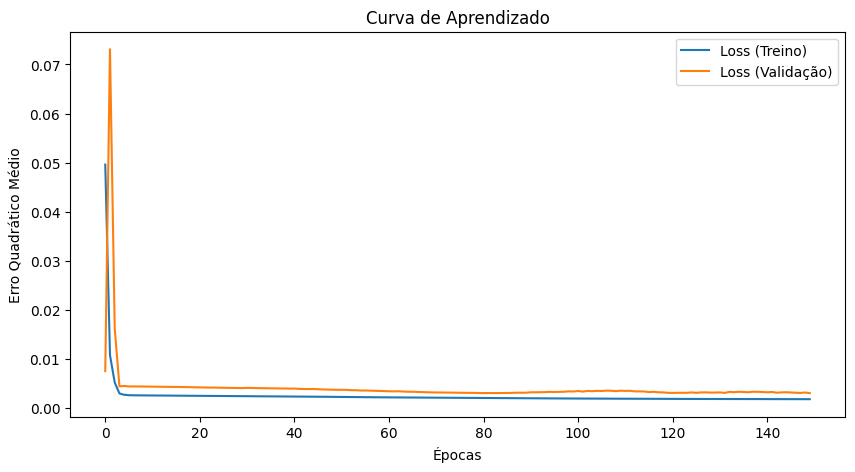

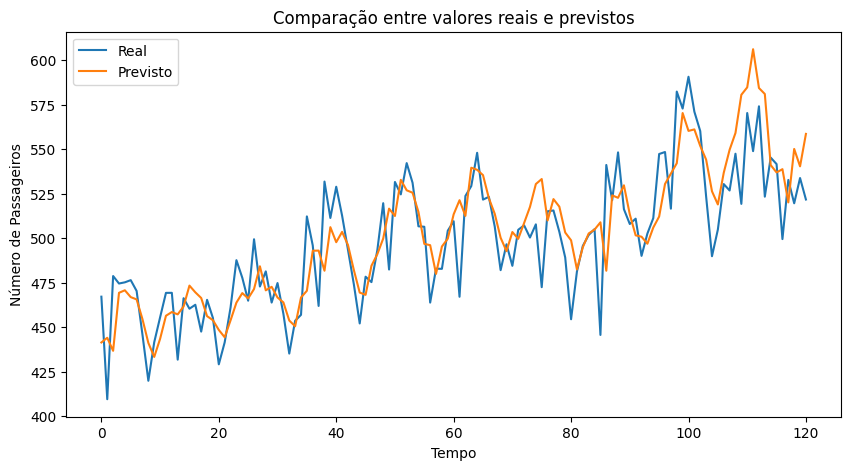

In [ ]:

df = pd.read_csv('../data_per_month.csv')  # Apenas a coluna de passageiros
df = df['Total Renewable Energy']

# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.values.reshape(-1, 1))

# Função para criar sequência de dados
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definir tamanho da janela
time_steps = 12
X, y = create_sequences(data_scaled, time_steps)

# Divisão dos dados
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construção da rede LSTM
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Avaliação do modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

# Fazer previsões
y_pred = model.predict(X_test)

# Reverter a normalização
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Cálculo das métricas de regressão
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot da curva de aprendizado
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (Treino)')
plt.plot(history.history['val_loss'], label='Loss (Validação)')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio')
plt.legend()
plt.title('Curva de Aprendizado')
plt.show()

# Plot dos resultados
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Previsto')
plt.xlabel('Tempo')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.title('Comparação entre valores reais e previstos')
plt.show()

In [10]:
# Exibir pesos das camadas
for i, layer in enumerate(model.layers):
    print(f'Pesos da camada {i} - {layer.name}')
    weights = layer.get_weights()
    for w in weights:
        print(w.shape)  # Mostra o formato dos pesos
        print(w)  # Exibe os pesos

Pesos da camada 0 - lstm
(1, 256)
[[ 0.13848634  0.2590705  -0.02523754  0.13751228 -0.10974517  0.05085227
   0.1288177  -0.10148272  0.00542813  0.05819003 -0.13262217  0.10905606
   0.1419265   0.03503384  0.00769166  0.09916697 -0.13434592  0.22194378
   0.02061725 -0.10704369 -0.14129104  0.19341764  0.15412673 -0.03708844
   0.10982793 -0.1262405  -0.0115252   0.01916717  0.06585522 -0.09162746
  -0.07073588  0.62356526 -0.12657228 -0.03147588 -0.07190401 -0.07027726
   0.10223284 -0.09707351  0.05744006  0.07900172 -0.12028533  0.01944646
  -0.05069074 -0.02894884  0.12832841 -0.02738267  0.00961697 -0.03747184
  -0.11527301  0.06585299  0.04640469  0.03913613 -0.1443112  -0.0948149
   0.1610334   0.11189831 -0.02105039 -0.0206915  -0.15663224 -0.14097087
   0.1369642   0.09740881 -0.01475415  0.06709456 -0.02667153 -0.11276599
  -0.03392209 -0.02338974  0.13171646  0.11118179  0.0439717   0.12128635
   0.10162915 -0.05513381  0.02081664 -0.3888297   0.13819583 -0.06402154
   0.